In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
# Set the style for plots
style.use("ggplot")

In [3]:
# Load the dataset
file_path = r'C:\Users\vashi\OneDrive\Desktop\traning\project\BlinkIt grocery Dataset.xlsx'  # Update with the correct file path if necessary
df = pd.read_excel(file_path)

In [4]:
# Inspect the data
print(df.head())
print(df.shape)
print(df.info())

  Item Fat Content Item Identifier              Item Type  \
0          Regular           FDX32  Fruits and Vegetables   
1          Low Fat           NCB42     Health and Hygiene   
2          Regular           FDR28           Frozen Foods   
3          Regular           FDL50                 Canned   
4          Low Fat           DRI25            Soft Drinks   

   Outlet Establishment Year Outlet Identifier Outlet Location Type  \
0                       2012            OUT049               Tier 1   
1                       2022            OUT018               Tier 3   
2                       2016            OUT046               Tier 1   
3                       2014            OUT013               Tier 3   
4                       2015            OUT045               Tier 2   

  Outlet Size        Outlet Type  Item Visibility  Item Weight     Sales  \
0      Medium  Supermarket Type1         0.100014        15.10  145.4786   
1      Medium  Supermarket Type2         0.008596     

In [5]:
# Data Cleaning and Preprocessing
# Check for null values
print(df.isnull().sum())

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64


In [6]:
# Drop duplicates if any
df = df.drop_duplicates()
print(df.shape)

(8523, 12)


In [7]:
# Describe the dataset
print(df.describe().round(2))

       Outlet Establishment Year  Item Visibility  Item Weight    Sales  \
count                    8523.00          8523.00      7060.00  8523.00   
mean                     2016.45             0.07        12.86   140.99   
std                         3.19             0.05         4.64    62.28   
min                      2011.00             0.00         4.56    31.29   
25%                      2014.00             0.03         8.77    93.83   
50%                      2016.00             0.05        12.60   143.01   
75%                      2018.00             0.09        16.85   185.64   
max                      2022.00             0.33        21.35   266.89   

        Rating  
count  8523.00  
mean      3.97  
std       0.61  
min       1.00  
25%       4.00  
50%       4.00  
75%       4.20  
max       5.00  


In [8]:
# Feature Engineering: Extracting Year and Month for Analysis
df['Establishment Year'] = df['Outlet Establishment Year']
df['Item Visibility Log'] = np.log(df['Item Visibility'] + 1)  


In [25]:
 #Monthly Sales Trend
# Assume "Outlet Establishment Year" and other details are monthly data in this context.
df_grouped = df.groupby('Establishment Year')['Sales'].sum().reset_index()
df_grouped


,Establishment Year,Sales
0,2011,78131.5666
1,2012,130476.8598
2,2014,131809.0156
3,2015,130942.7802
4,2016,132113.3698
5,2017,133103.9070
6,2018,204522.2570
7,2020,129103.9604
8,2022,131477.7764


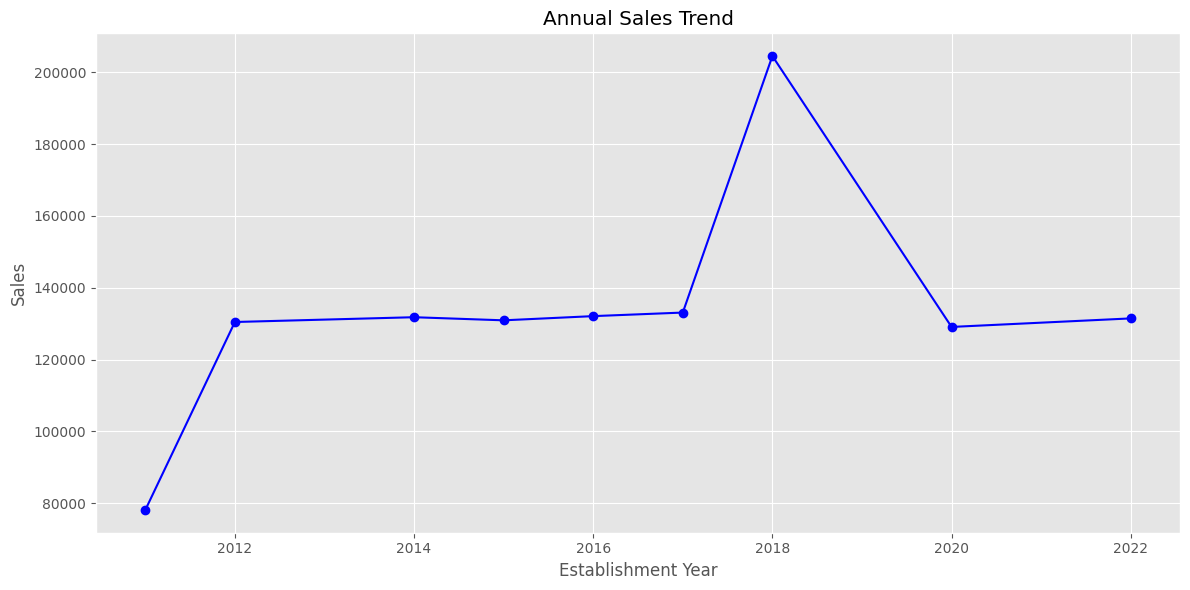

In [10]:
plt.figure(figsize=(12, 6))
plt.plot(df_grouped['Establishment Year'], df_grouped['Sales'], marker='o', linestyle='-', color='b')
plt.title('Annual Sales Trend')
plt.xlabel('Establishment Year')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()

In [11]:

# Top Selling Items by Sales
df_grouped = df.groupby('Item Identifier')['Sales'].sum().reset_index()
df_sorted = df_grouped.sort_values(by='Sales', ascending=False)
top_ten_products = df_sorted.head(10)
print("Top 10 Selling Items:")
print(top_ten_products)

Top 10 Selling Items:
     Item Identifier      Sales
976            FDU12  2371.0112
921            FDT07  2306.8970
1454           NCQ06  2294.7126
616            FDL58  2111.6544
1279           NCB31  2104.7280
1141           FDX31  2104.4622
359            FDF05  2103.1280
866            FDR59  2096.5752
753            FDP28  2087.8488
148            FDA04  2072.0696


In [12]:
# Top 5 Products with Lowest Sales
bottom_five_products = df_sorted.tail(5)
print("Bottom 5 Products with Lowest Sales:")
print(bottom_five_products)

Bottom 5 Products with Lowest Sales:
     Item Identifier     Sales
1474           NCR42  101.0700
351            FDE52   88.9514
686            FDN52   86.9198
379            FDF38   80.2276
1293           NCC55   72.8696


In [13]:
# Most Selling Products by Item Weight (as a proxy for quantity)
df_grouped = df.groupby('Item Identifier')['Item Weight'].sum().reset_index()
df_sorted = df_grouped.sort_values(by='Item Weight', ascending=False)
most_selling_product = df_sorted.head(10)
print("Top 10 Selling Products by Item Weight:")
print(most_selling_product)

Top 10 Selling Products by Item Weight:
     Item Identifier  Item Weight
35             DRE49       166.00
398            FDG09       164.80
1141           FDX31       142.45
702            FDO19       141.60
1212           FDY57       141.40
1066           FDV60       141.40
1158           FDX50       140.70
327            FDE17       140.70
178            FDA44       137.90
1276           NCB18       137.20


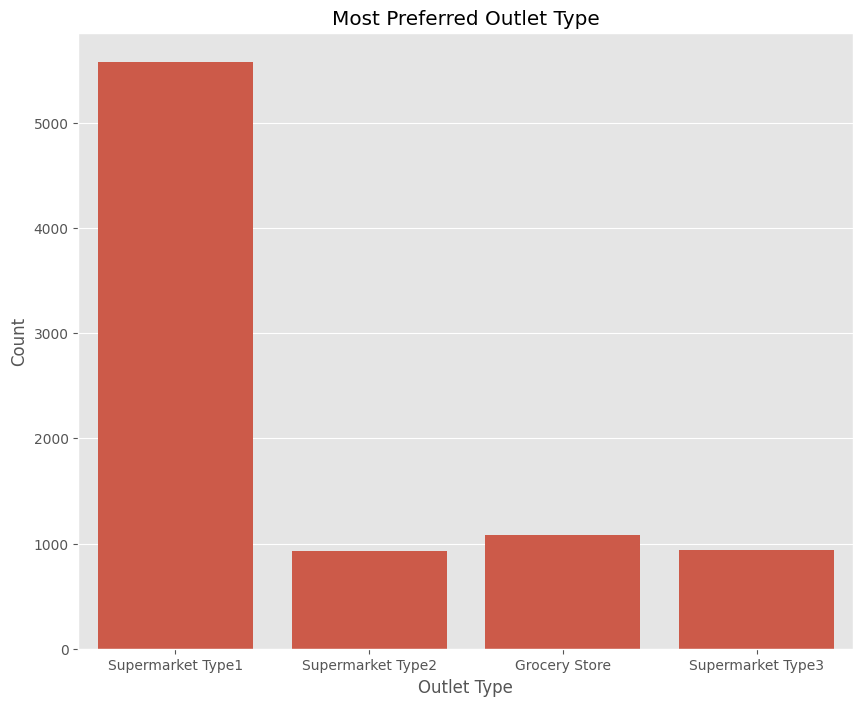

In [14]:
# Most Preferred Outlet Type
plt.figure(figsize=(10, 8))
sns.countplot(x='Outlet Type', data=df)
plt.title('Most Preferred Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Count')
plt.show()

In [15]:
# Outlet Type with the Highest Sales
df_grouped = df.groupby('Outlet Type')['Sales'].sum().reset_index()
df_sorted = df_grouped.sort_values(by='Sales', ascending=False)
highest_sales_outlet_type = df_sorted.head(1)
print("Outlet Type with the Highest Sales:")
print(highest_sales_outlet_type)

Outlet Type with the Highest Sales:
         Outlet Type        Sales
1  Supermarket Type1  787549.8928


C:\Users\vashi\AppData\Local\Temp\ipykernel_3328\2847284248.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Outlet Type', y='Sales', data=df_sorted, palette='viridis')


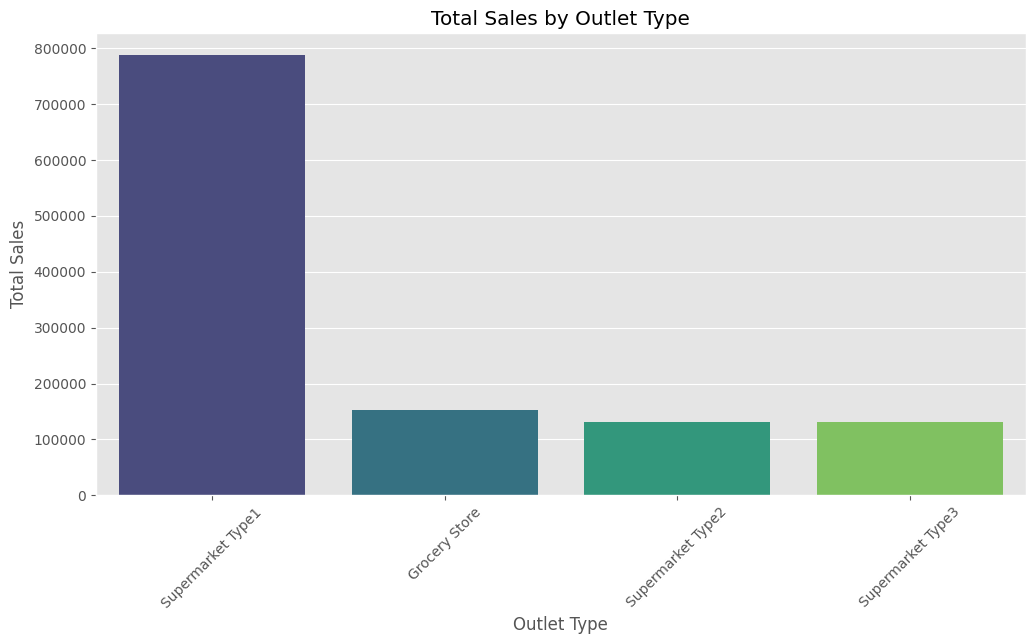

In [16]:
plt.figure(figsize=(12, 6))
sns.barplot(x='Outlet Type', y='Sales', data=df_sorted, palette='viridis')
plt.title('Total Sales by Outlet Type')
plt.xlabel('Outlet Type')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

In [24]:
# Analysis by Item Type and Outlet Size
df_grouped = df.groupby(['Item Type', 'Outlet Size'])['Sales'].sum().reset_index()
df_sorted = df_grouped.sort_values(by='Sales', ascending=False)
print(df_grouped)
print(df_sorted)




                Item Type Outlet Size       Sales
0            Baking Goods        High  20278.1840
1            Baking Goods      Medium  32976.8342
2            Baking Goods       Small  28639.7182
3                  Breads        High   7357.4532
4                  Breads      Medium  15262.8910
5                  Breads       Small  12758.7756
6               Breakfast        High   4073.3038
7               Breakfast      Medium   6734.8514
8               Breakfast       Small   4788.5414
9                  Canned        High  19360.3796
10                 Canned      Medium  38408.8152
11                 Canned       Small  32937.5342
12                  Dairy        High  21092.5046
13                  Dairy      Medium  44507.9662
14                  Dairy       Small  35675.9908
15           Frozen Foods        High  24986.2550
16           Frozen Foods      Medium  50019.6094
17           Frozen Foods       Small  43553.0170
18  Fruits and Vegetables        High  34833.2214


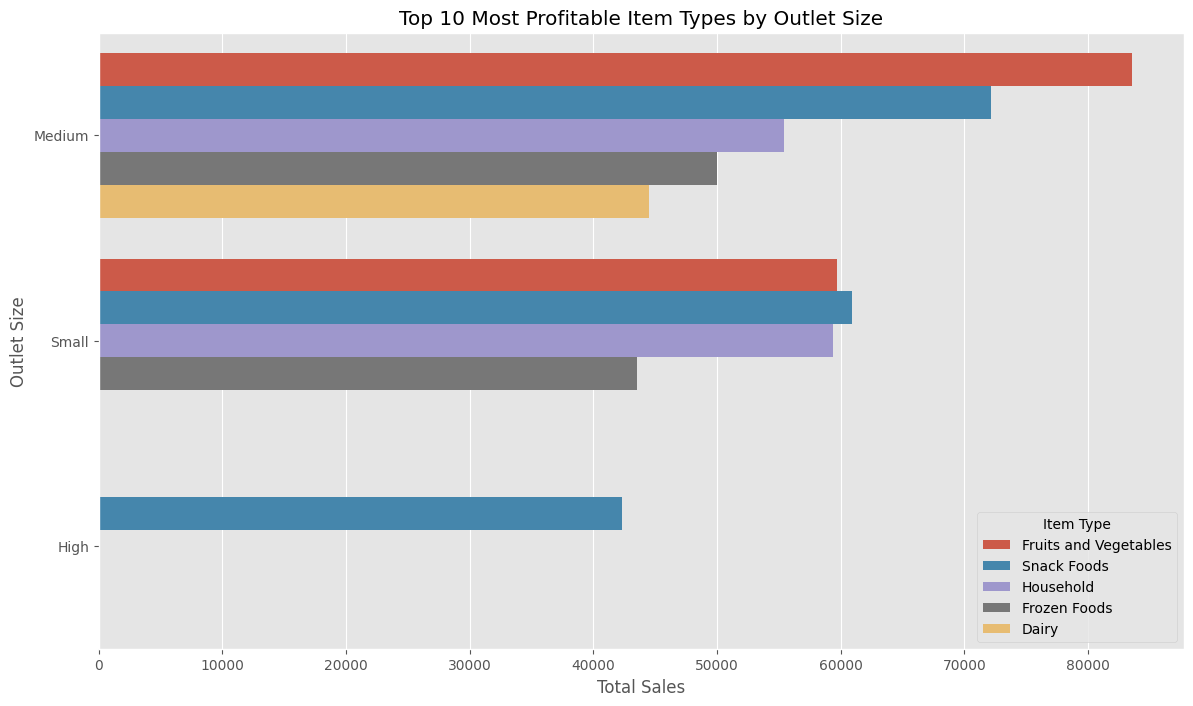

In [18]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Sales', y='Outlet Size', hue='Item Type', data=df_sorted.head(10))
plt.title('Top 10 Most Profitable Item Types by Outlet Size')
plt.xlabel('Total Sales')
plt.ylabel('Outlet Size')
plt.show()

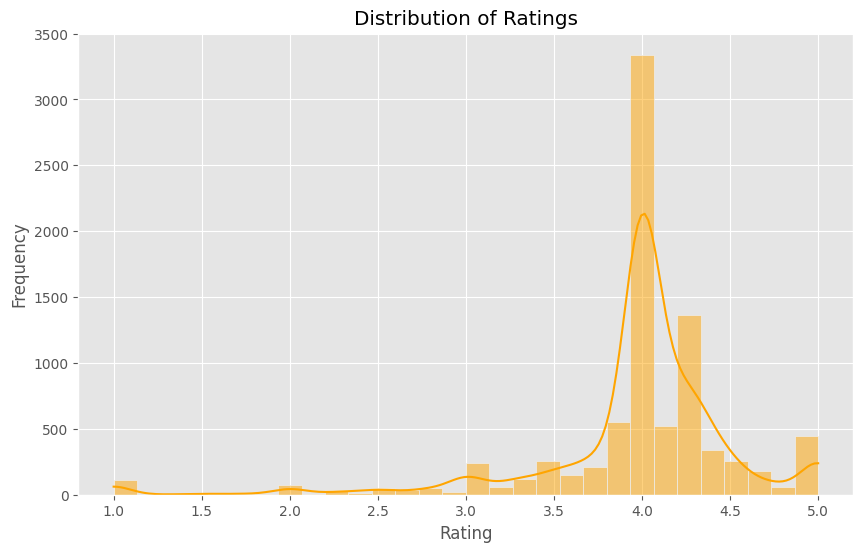

In [19]:
# Rating Distribution Analysis
plt.figure(figsize=(10, 6))
sns.histplot(df['Rating'], bins=30, kde=True, color='orange')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

In [21]:
# Analyzing Sales by Rating
df_grouped = df.groupby('Rating')['Sales'].sum().reset_index()
df_grouped

,Rating,Sales
0,1.0,14930.7728
1,1.2,223.5404
2,1.3,266.1516
3,1.4,172.8396
4,1.5,1612.5334
5,1.7,1027.8604
6,1.8,753.4804
7,1.9,106.3306
8,2.0,10195.2296
9,2.1,373.3796


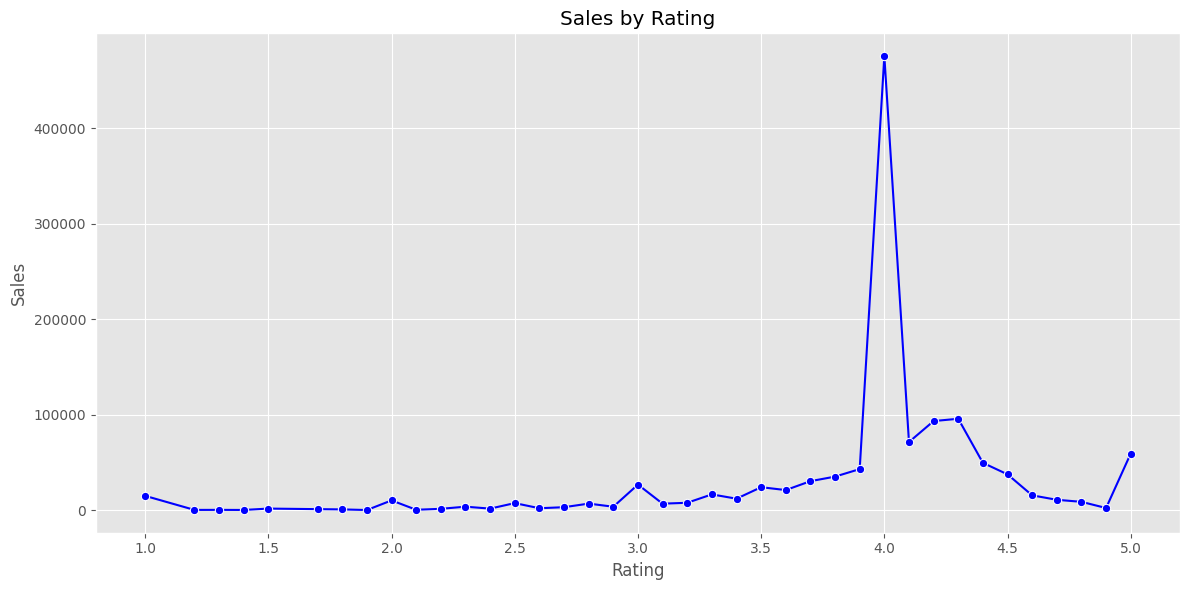

In [22]:

plt.figure(figsize=(12, 6))
sns.lineplot(x='Rating', y='Sales', data=df_grouped, marker='o', color='blue')
plt.title('Sales by Rating')
plt.xlabel('Rating')
plt.ylabel('Sales')
plt.grid(True)
plt.tight_layout()
plt.show()